## 1. Analyze and Prepare a Spam Email Dataset for Classification

<p>Your task is to prepare the initial dataset for this classification project. The dataset, named "spam.csv", contains various emails labeled as spam or not. You will use Python with Pandas and NumPy libraries to load and inspect the dataset.</p>

In [3]:
# Import Pandas and NumPy libraries
import pandas as pd
import numpy as np

In [4]:
# Read the spam.csv file into a DataFrame
df = pd.read_csv("spam.csv")
 
# Display the first five rows of the DataFrame to preview the data
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 2. Visualizing Spam Message Data Using Word Clouds

<p>Your goal is to analyze the distribution of message categories and visually represent the most common words found in spam messages using a word cloud. This task will utilize Python libraries like Matplotlib for visualization and WordCloud for creating the word cloud. By the end of this task, you will have a clear visual representation of the common terminology used in spam emails.</p>

In [7]:
# Import Matplotlib and WordCloud libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [8]:
# Analyze the distribution of message categories
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [9]:
# Combine all spam messages into one large string
spam_words = ' '.join(list(df[df['Category'] == 'spam']['Message']))
spam_words[:100]

'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entr'

In [10]:
# Generate a word cloud from the spam messages
spam_wc = WordCloud(width = 512, height = 512).generate(spam_words)

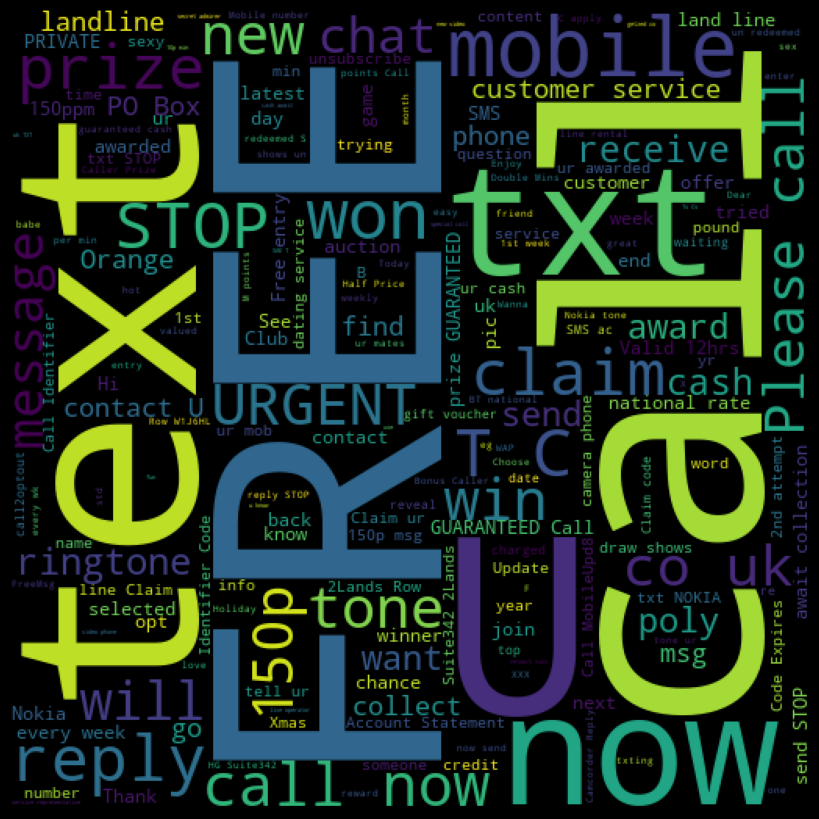

In [11]:
# Set up the plot with specified figure size and background color
plt.figure(figsize = (10, 8), facecolor = 'k')
# Display the word cloud image
plt.imshow(spam_wc)
# Remove axis for visual clarity
plt.axis('off')
# Adjust layout and show the plot
plt.tight_layout(pad = 0)
plt.show()

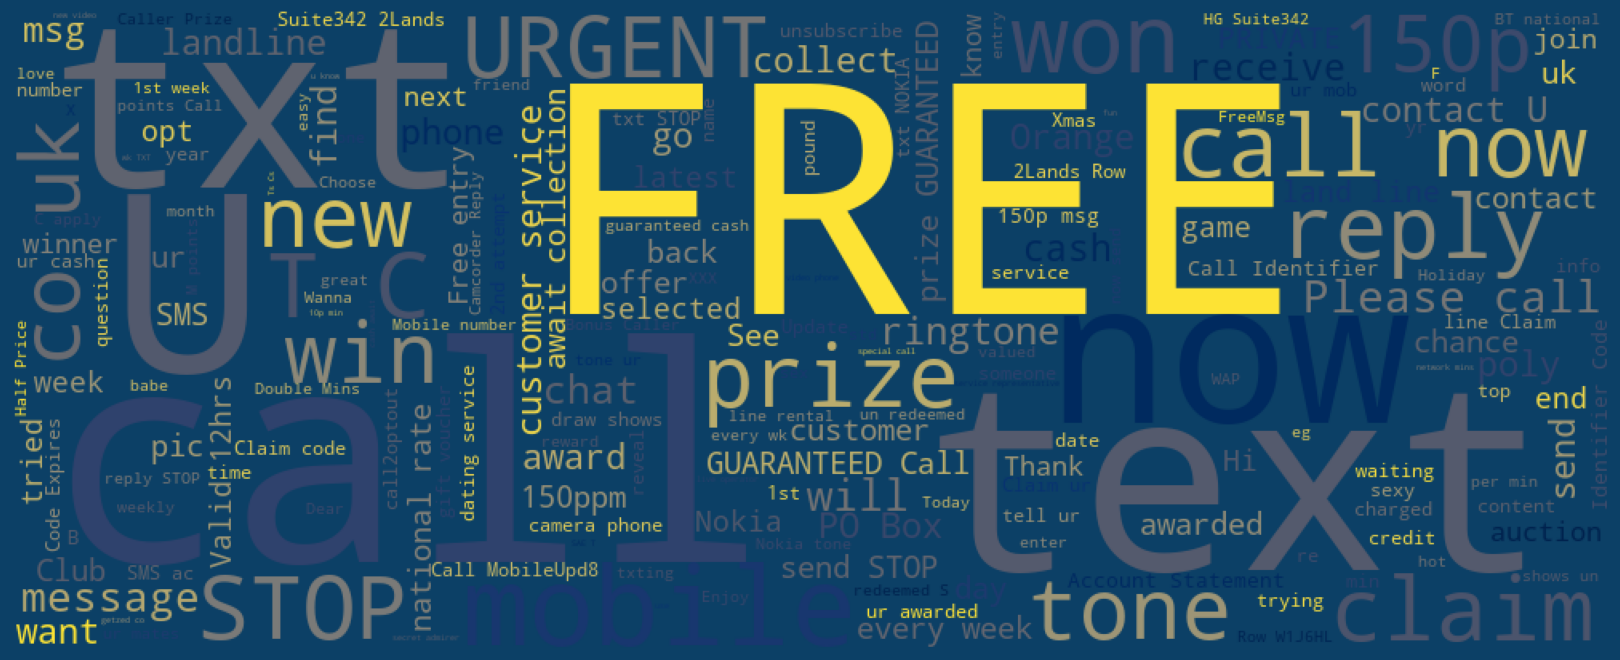

In [12]:
spam_wc2 = WordCloud(width = 1000, height = 400, background_color='#0C4066', colormap='cividis').generate(spam_words)
# Set up the plot with specified figure size and background color
plt.figure(figsize = (16, 8), facecolor='#0C4066')
# Display the word cloud image
plt.imshow(spam_wc2)
# Remove axis for visual clarity
plt.axis('off')
# Adjust layout and show the plot
plt.tight_layout(pad = 0)
plt.show()

## 3. Preprocessing and Feature Extraction

<p>This task involves preprocessing the text data and transforming it into a suitable format for machine learning models. You will clean the text data, convert categories to numerical values, and then apply Term Frequency-Inverse Document Frequency (TF-IDF) vectorization. Finally, you'll split the dataset into training and test sets.</p>

In [15]:
# Import necessary libraries from sklearn and re module
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import re

In [16]:
# Define a function to clean the text data
def clean_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove non-word characters
    text = text.lower()              # Convert to lowercase
    text = re.sub(r'\s+', ' ', text) # Replace multiple spaces with a single space
    return text

In [17]:
# Clean all messages in the DataFrame
df['Message'] = df['Message'].apply(clean_text)
df['Message']

0       go until jurong point crazy available only in ...
1                                ok lar joking wif u oni 
2       free entry in 2 a wkly comp to win fa cup fina...
3            u dun say so early hor u c already then say 
4       nah i don t think he goes to usf he lives arou...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                 will ü b going to esplanade fr home 
5569    pity was in mood for that so any other suggest...
5570    the guy did some bitching but i acted like i d...
5571                            rofl its true to its name
Name: Message, Length: 5572, dtype: object

In [18]:
# Convert 'ham' and 'spam' labels to 0 and 1
df['Category'] = df['Category'].map({'ham': 0, 'spam': 1})
df['Category']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5572, dtype: int64

In [19]:
# Initialize and apply TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df['Message']).toarray()

In [20]:
# Extract labels into a separate array
y = df['Category'].values
 
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1502)

## 4. Building and Compiling a Neural Network

<p>This stage involves using TensorFlow and Keras to construct a Sequential model with Dense layers. You will also include Dropout for regularization to prevent overfitting. The model will be compiled with an appropriate optimizer, loss function, and metrics for a binary classification problems: accuracy, precision, recall, AUC.</p>

In [23]:
# pip install tensorflow

In [24]:
# Import TensorFlow and Keras modules
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

<p>Build the Sequential Model. Initialize a Sequential model. Add a Dense layer with 50 units and 'relu' activation function. The input dimension should match the number of features from the TF-IDF vectorizer. Add a Dropout layer with a dropout rate of 0.5 to prevent overfitting. Add an output Dense layer with 1 unit and 'sigmoid' activation function for binary classification.</p>

In [26]:
# Building the neural network model
model = Sequential()
model.add(Dense(units=50, activation='relu', input_dim=len(tfidf_vectorizer.get_feature_names_out())))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

C:\Users\ssour\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<p>Compile the model using 'adam' optimizer. Use 'binary_crossentropy' as the loss function, suitable for binary classification tasks. Include accuracy, precision, Recall and AUC in the metrics for model evaluation.</p>

In [28]:
# Compiling the model with additional metrics for handling class imbalance
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

## 5. Training a Neural Network with Early Stopping

<p>In this phase, you will implement a training process using TensorFlow, incorporating Early Stopping as a callback. Your task involves setting up the Early Stopping callback and training the model on your preprocessed dataset.</p>

Initialize an EarlyStopping callback from TensorFlow's Keras API. Monitor the 'loss' during training, and set 'patience' to 3.

In [32]:
# Initialize the EarlyStopping callback
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

<p>Train the model using the <code><strong>fit</strong></code> method on the training data. Set the number of epochs to 10 and batch size to 64 and include the Early Stopping callback in the training process.</p>

In [34]:
# Training the model with callbacks
history = model.fit(X_train, 
                    y_train, 
                    validation_split=0.2,
                    epochs=10, 
                    batch_size=64, 
                    callbacks=[callback])

Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8062 - auc: 0.6327 - loss: 0.6399 - precision: 0.2010 - recall: 0.1390 - val_accuracy: 0.8610 - val_auc: 0.9541 - val_loss: 0.4585 - val_precision: 1.0000 - val_recall: 0.0080
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8671 - auc: 0.9340 - loss: 0.4048 - precision: 0.7966 - recall: 0.0439 - val_accuracy: 0.8957 - val_auc: 0.9759 - val_loss: 0.2833 - val_precision: 1.0000 - val_recall: 0.2560
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9221 - auc: 0.9733 - loss: 0.2492 - precision: 1.0000 - recall: 0.4424 - val_accuracy: 0.9507 - val_auc: 0.9838 - val_loss: 0.1803 - val_precision: 1.0000 - val_recall: 0.6480
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9652 - auc: 0.9868 - loss: 0.1634 - precision: 0.9991 - recall: 0.7663 - val_accuracy: 0.9742 - val_auc: 0.9875 - val_loss: 0.1248 - val_precision: 1.0000 - val_recall: 0.8160
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0

## 6. Evaluating the Performance of the Classification Model

<p>In this task, you will be assessing the performance of the recently trained neural network model on the test dataset. You will generate a classification report that provides key metrics such as precision, recall, and f1-score for each class, and you will also compute a confusion matrix to visualize the model's prediction accuracy in detail.</p>

In [37]:
# Import necessary functions from scikit-learn
from sklearn.metrics import classification_report, confusion_matrix

<p>Use the model to predict the labels for the test set and apply a threshold of 0.5 to convert probabilities to binary labels.</p>

In [39]:
# Predict on the test set and apply a threshold to get binary labels
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


<p>Use the <code><strong>classification_report</strong></code> function to obtain a report on several metrics.</p>

In [41]:
# Generate and print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       978
           1       0.98      0.93      0.95       137

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



Notice that the model demonstrates high precision and recall for classifying non-spam (label 0) and spam emails (label 1), with almost perfect scores in identifying non-spam messages and slightly lower, yet still robust, performance on spam. 

<p>Use the <code><strong>confusion_matrix</strong></code> function to compute the confusion matrix.</p>

In [44]:
# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[976   2]
 [ 10 127]]


## 7. Visualizing Comprehensive Performance Metrics

<p>You will enhance the evaluation of your spam classification model by visualizing a complete set of performance metrics. Your goal is to plot not only the accuracy and loss over training epochs but also the Area Under the Receiver Operating Characteristic Curve (AUC), precision, and recall.</p>

<p>Retrieve the AUC, precision, and recall metrics for both training and validation phases from the model's training history.</p>

In [48]:
# Accessing the history object for performance metrics
train_auc = history.history['auc']
train_precision = history.history['precision']
train_recall = history.history['recall']
train_accuracy = history.history['accuracy']
val_auc = history.history['val_auc']
val_precision = history.history['val_precision']
val_recall = history.history['val_recall']
val_accuracy = history.history['val_accuracy']

<p>Define a large enough figure size to ensure that all subplots are readable. Create the first subplot to visualize the accuracy over epochs for both training and validation sets.</p>

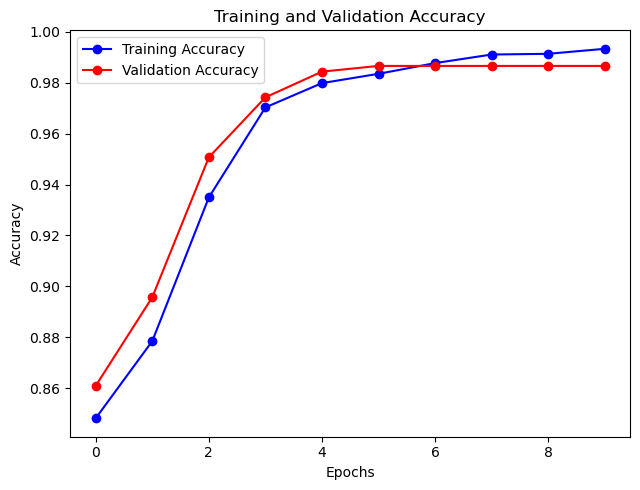

In [50]:
# Setting up the plot environment
plt.figure(figsize=(18, 5))
 
# Plotting training & validation accuracy
plt.subplot(1, 3, 1)
plt.plot(train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
 
# Adjusting the layout and displaying the plot
plt.tight_layout()
plt.show()

<p>Plot all the KPIs using the subplot function.</p>

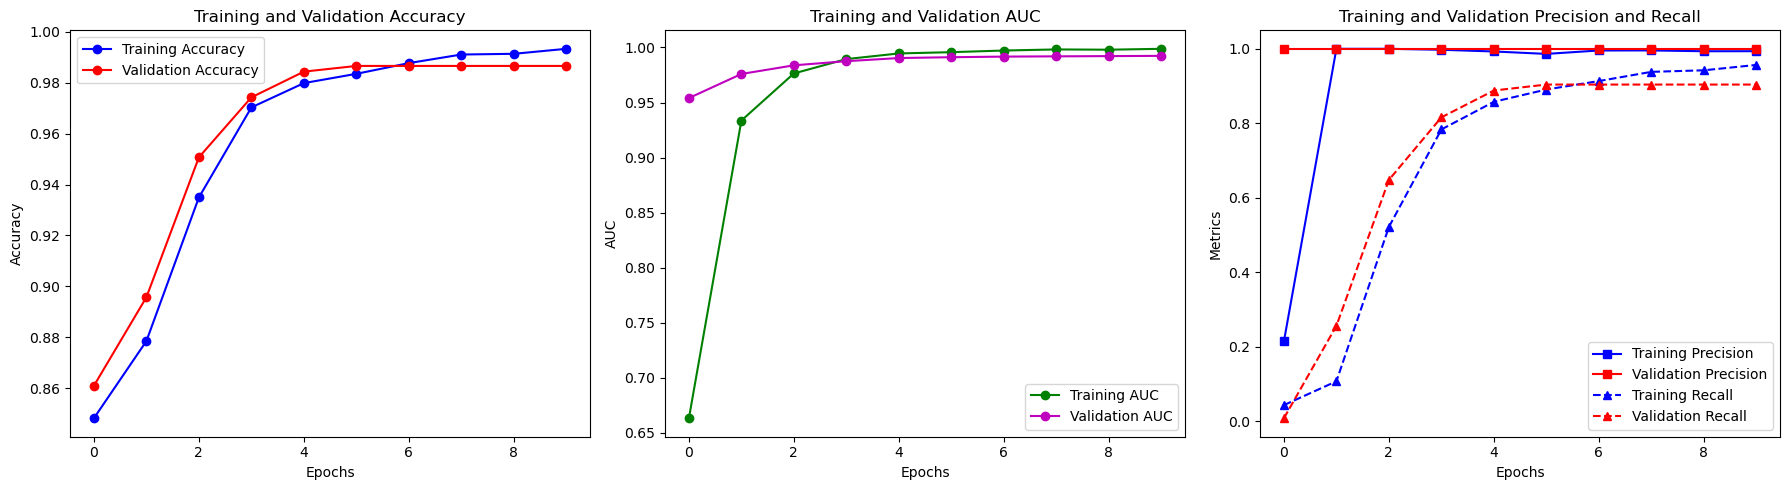

In [52]:
# Setting up the plot environment
plt.figure(figsize=(18, 5))
 
# Plotting training & validation accuracy
plt.subplot(1, 3, 1)
plt.plot(train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
 
# Plotting training & validation AUC
plt.subplot(1, 3, 2)
plt.plot(train_auc, 'go-', label='Training AUC')
plt.plot(val_auc, 'mo-', label='Validation AUC')
plt.title('Training and Validation AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
 
# Plotting training & validation precision and recall
plt.subplot(1, 3, 3)
plt.plot(train_precision, 'bs-', label='Training Precision')
plt.plot(val_precision, 'rs-', label='Validation Precision')
plt.plot(train_recall, 'b^--', label='Training Recall')
plt.plot(val_recall, 'r^--', label='Validation Recall')
plt.title('Training and Validation Precision and Recall')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
 
# Adjusting the layout and displaying the plot
plt.tight_layout()
plt.show()

## 8. Hyperparameter Optimization for Neural Network

<p>As part of the data science team at NetSafe Inc., you are tasked with optimizing the neural network used for spam email classification. Your goal is to find the best hyperparameters for the model's architecture and training process, including the number of neurons in the dense layer, the dropout rate, and the learning rate for the optimizer. For this purpose, you will employ the capabilities of Keras Tuner and utilize Hyperband, an advanced hyperparameter tuning method.</p>
<p><strong>Parameters to include</strong>:</p>
<ul><li><p><strong>First Layer</strong>: Add a Dense layer with units ranging from 32 to 512 (inclusive). This range is specified by <code><strong>hp.Int('units', min_value=32, max_value=512, step=32)</strong></code>. The <code><strong>relu</strong></code> activation function should be used.</p></li><li><p><strong>Dropout Layer</strong>: Include a Dropout layer to prevent overfitting. The dropout rate is a tunable hyperparameter ranging from 0.0 to 0.5, with a default of 0.25 and a step of 0.05 (<code><strong>hp.Float('dropout', min_value=0.0, max_value=0.5, default=0.25, step=0.05)</strong></code>).</p></li><li><p><strong>Compile the Model</strong>: Compile the model with a binary cross-entropy loss function. Use the Adam optimizer with a tunable learning rate (<code><strong>hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])</strong></code>). Include accuracy as a metric.</p></li><li><p><strong>Initialize the Hyperband Tuner</strong>:</p><ul><li><p>Set the objective to 'val_auc' to focus on maximizing the validation AUC.</p></li><li><p>Limit the maximum epochs to 10 and use a factor of 3 for computational efficiency.</p></li></ul></li><li><p><strong>Set Up Early Stopping</strong>: Define an EarlyStopping callback to monitor the validation loss ('val_loss') and set a patience of 5 epochs.</p></li><li><p><strong>Execute Hyperparameter Search</strong>:</p><ul><li><p>Pass the training data (<code><strong>X_train</strong></code>, <code><strong>y_train</strong></code>) and specify 10 epochs for each trial.</p></li><li><p>Use a validation split of 0.2 to evaluate the model performance during training.</p></li><li><p>Include the EarlyStopping callback in the search process.</p></li></ul></li></ul>


<p>Import the Keras Tuner package and define the <code><strong>build_model</strong></code> function that constructs a Sequential model using hyperparameters from the search space.</p>

In [56]:
# !pip install keras-tuner --upgrade

In [57]:
# Import Keras Tuner
import keras_tuner as kt
 
# Define the model building function for Keras Tuner
def build_model(hp):
    model = Sequential()
    # Add a dense layer with a dynamic number of units and 'relu' activation
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
                    activation='relu',
                    input_dim=len(tfidf_vectorizer.get_feature_names_out())))
    # Add a dropout layer with a tunable dropout rate
    model.add(Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, default=0.25, step=0.05)))
    # Add the output layer with a sigmoid activation for binary classification
    model.add(Dense(units=1, activation='sigmoid'))
 
    # Compile the model with a tunable learning rate for the Adam optimizer
    model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', 
                                                               values=[1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy',
                  metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])
    return model

<p>Initialize the Hyperband tuner with the defined <code><strong>build_model</strong></code> function, specifying the objective, maximum epochs, and other configurations. Use early stopping to halt training if no improvement in validation loss is observed.</p>

In [59]:
# Initialize the Hyperband tuner
tuner = kt.Hyperband(build_model,
                     objective=kt.Objective('val_auc', direction='max'),
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')
 
# Define an EarlyStopping callback
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

Reloading Tuner from my_dir\intro_to_kt\tuner0.json


<p>Execute the search method on the tuner object with the training data, specifying the number of epochs, validation split, and callbacks.</p>

In [61]:
# Execute the hyperparameter search over the training data
tuner.search(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

<p>Extract the best hyperparameters and print them out.</p>

In [63]:
# Get the best hyperparameters from the search
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
 
# Print the optimal hyperparameters
print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")


The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 256 and the optimal learning rate for the optimizer
is 0.001.



## 9. Save a Tuned Neural Network Model for Text Classification

<p>You will take the optimized neural network model and save it for text classification. The objective is to utilize the best model configuration identified in the previous task and make it available for real-time predictions. This involves building the model with the identified hyperparameters, training it on the full dataset, evaluating its performance, and then saving it.</p>

Retrieve the best hyperparameters.

In [67]:
# Get the best hyperparameters
best_hp = tuner.get_best_hyperparameters()[0]
 
# Rebuild the model with the best hyperparameters
best_model = build_model(best_hp)

C:\Users\ssour\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Assign the Full Dataset to Variables:

In [69]:
# Assuming 'df' is your full DataFrame and has already undergone necessary preprocessing steps
# Apply TF-IDF transformation to the 'Message' column
X_full = tfidf_vectorizer.transform(df['Message']).toarray()  
y_full = df['Category'].values  # Assuming 'Category' column contains the labels

Train the model on the full dataset.

In [71]:
# Fit the model on the full dataset
best_model.fit(X_full, y_full, epochs=10, batch_size=32)

Epoch 1/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8548 - auc: 0.7435 - loss: 0.4283
Epoch 2/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9872 - auc: 0.9966 - loss: 0.0530
Epoch 3/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9954 - auc: 0.9996 - loss: 0.0200
Epoch 4/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9987 - auc: 1.0000 - loss: 0.0094
Epoch 5/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9988 - auc: 1.0000 - loss: 0.0053
Epoch 6/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 1.0000 - auc: 1.0000 - loss: 0.0036
Epoch 7/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 1.0000 - auc: 1.0000 - loss: 0.0020
Epoch 8/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 1.0000 - auc: 1.0000 - loss: 0.0013
Epoch 9/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 1.0000 - auc: 1.0000 - loss: 9.5956e-04
Epoch 10/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 1.0000 - auc: 1.0000 - loss

Evaluate the model.

In [73]:
# Assuming X_test and y_test are your test datasets
evaluation_results = best_model.evaluate(X_test, y_test)
print(f"Test Loss: {evaluation_results[0]}, Test Accuracy: {evaluation_results[1]}")

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - auc: 1.0000 - loss: 4.4132e-04
Test Loss: 0.0004481491632759571, Test Accuracy: 1.0


Save the trained model:

In [75]:
# Save the model in HDF5 format
best_model.save("text_classification_model.keras")